In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
# %matplotlib inline
import math

import warnings
warnings.filterwarnings('ignore')


from sklearn import metrics

from scipy.special import legendre
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [4]:
df = pd.read_csv('all_matches_final.csv')
df.describe()

,draw_size,tourney_date,match_num,Player1_ht,Player1_age,best_of,minutes,Player2_id,Player2_seed,Player2_ht,...,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,Player2_rank,Player2_rank_points,Player1_rank,Player1_rank_points,y
count,15750.000000,1.575000e+04,15750.000000,15509.000000,15749.000000,15750.000000,15357.000000,15750.000000,5322.000000,15548.000000,...,15393.000000,15393.000000,15394.000000,15393.000000,15393.000000,15608.000000,15608.000000,15610.000000,15610.000000,15750.000000
mean,59.335873,2.018378e+07,253.659556,187.108711,27.441177,3.417143,111.440776,113455.975873,8.063510,186.975945,...,33.854090,15.135386,12.621866,4.853570,8.663743,88.752627,1506.370003,94.289430,1519.173735,0.500000
std,42.194044,1.714839e+04,149.409187,7.050038,4.713650,0.812600,43.758776,22501.533181,7.138448,7.037162,...,14.707076,7.146421,4.313300,3.325682,4.233823,142.334692,1854.795658,161.178411,1868.849654,0.500016
min,2.000000,2.016010e+07,1.000000,163.000000,14.500000,3.000000,0.000000,100644.000000,1.000000,170.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,32.000000,2.017041e+07,218.000000,183.000000,23.700000,3.000000,80.000000,104918.000000,3.000000,183.000000,...,23.000000,10.000000,9.000000,2.000000,6.000000,25.000000,626.000000,26.000000,611.000000,0.000000
50%,32.000000,2.018073e+07,277.000000,188.000000,27.500000,3.000000,104.000000,105583.000000,6.000000,188.000000,...,32.000000,14.000000,12.000000,4.000000,8.000000,54.000000,945.000000,56.000000,920.000000,0.500000
75%,64.000000,2.020012e+07,290.000000,191.000000,31.000000,3.000000,135.000000,106401.000000,10.000000,191.000000,...,42.000000,19.000000,15.000000,7.000000,11.000000,95.000000,1633.500000,97.000000,1588.750000,1.000000
max,128.000000,2.021120e+07,1701.000000,211.000000,46.000000,5.000000,1146.000000,211415.000000,33.000000,211.000000,...,171.000000,55.000000,50.000000,27.000000,38.000000,2146.000000,16950.000000,2147.000000,16950.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15750 entries, 0 to 15749
Data columns (total 50 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   tourney_id           15750 non-null  object 
 1   tourney_name         15750 non-null  object 
 2   surface              15750 non-null  object 
 3   draw_size            15750 non-null  int64  
 4   tourney_level        15750 non-null  object 
 5   tourney_date         15750 non-null  int64  
 6   match_num            15750 non-null  int64  
 7   Player1_entry        2916 non-null   object 
 8   Player1_name         15750 non-null  object 
 9   Player1_hand         15726 non-null  object 
 10  Player1_ht           15509 non-null  float64
 11  Player1_ioc          15750 non-null  object 
 12  Player1_age          15749 non-null  float64
 13  score                15750 non-null  object 
 14  best_of              15750 non-null  int64  
 15  round                15750 non-null 

**Missing** **values**

In [6]:
missing_values = df.isnull().sum()
missing_values

tourney_id                 0
tourney_name               0
surface                    0
draw_size                  0
tourney_level              0
tourney_date               0
match_num                  0
Player1_entry          12834
Player1_name               0
Player1_hand              24
Player1_ht               241
Player1_ioc                0
Player1_age                1
score                      0
best_of                    0
round                      0
minutes                  393
Player2_id                 0
Player2_seed           10428
Player2_entry          12917
Player2_name               0
Player2_hand               8
Player2_ht               202
Player2_ioc                0
Player2_age                0
Player1_id                 0
Player1_seed           10597
w_ace                    357
w_df                     357
w_svpt                   357
w_1stIn                  357
w_1stWon                 357
w_2ndWon                 357
w_SvGms                  356
w_bpSaved     

**Separating Features**

In [7]:
players = ['Player1_id','Player1_name','Player2_id','Player2_name']

to_drop = ['match_num','tourney_id','tourney_date','score','Player1_entry','Player2_entry','Player2_seed','Player1_seed','tourney_name']

cat_cols = ['surface','draw_size','tourney_level','Player1_hand','Player1_ioc',
            'Player2_hand','Player2_ioc','best_of','round']


num_cols = ['Player1_ht','Player1_age','Player1_rank','Player1_rank_points',
            'Player2_ht','Player2_age','Player2_rank','Player2_rank_points','minutes','w_ace','w_df',
            'w_svpt','w_1stIn','w_1stWon','w_2ndWon','w_SvGms','w_bpSaved','w_bpFaced','l_ace','l_df','l_svpt','l_1stIn',
            'l_1stWon','l_2ndWon','l_SvGms','l_bpSaved','l_bpFaced']

**Dropping Irrelevant Features**

In [8]:
df = df.drop(to_drop, axis=1)


**Replacing Missing Values**

In [5]:
for i in cat_cols:
    df[i] = df[i].replace(np.NaN, df[i].mode()[0])


In [9]:
for i in num_cols:
    df[i] = df[i].replace(np.NaN,df[i].mean())

**convert categorical data to numeric**

In [10]:
def convertCatToNum(dff):
    dff_new = pd.get_dummies(dff, columns=cat_cols)
    return dff_new
df = convertCatToNum(df)
df.head()

,Player1_name,Player1_ht,Player1_age,minutes,Player2_id,Player2_name,Player2_ht,Player2_age,Player1_id,w_ace,...,best_of_5,round_BR,round_F,round_QF,round_R128,round_R16,round_R32,round_R64,round_RR,round_SF
0,Sebastian Ofner,191.0,23.2,102.0,111192,Lucas Miedler,183.0,23.1,124116,8.0,...,False,False,False,False,False,False,True,False,False,False
1,Kei Nishikori,178.0,28.6,136.0,104259,Philipp Kohlschreiber,178.0,34.8,105453,5.0,...,True,False,False,False,False,True,False,False,False,False
2,Konstantin Kravchuk,190.0,32.0,121.0,126207,Frances Tiafoe,188.0,19.1,104505,12.0,...,False,False,False,False,True,False,False,False,False,False
3,Ugo Humbert,188.0,22.9,111.0,100644,Alexander Zverev,198.0,24.1,200005,10.0,...,False,False,False,False,False,True,False,False,False,False
4,Ivo Karlovic,208.0,39.3,115.0,104534,Dudi Sela,175.0,33.2,103333,4.0,...,False,False,False,False,False,True,False,False,False,False


**Normalize** **numeric** **features**


In [11]:
def normalize(dff,col_name_list):
    result = dff.copy()
    for feature_name in col_name_list:
        max_value = dff[feature_name].max()
        min_value = dff[feature_name].min()
        result[feature_name] = (dff[feature_name] - min_value) / (max_value - min_value)
    return result


df = normalize(df,num_cols)
df.head()

,Player1_name,Player1_ht,Player1_age,minutes,Player2_id,Player2_name,Player2_ht,Player2_age,Player1_id,w_ace,...,best_of_5,round_BR,round_F,round_QF,round_R128,round_R16,round_R32,round_R64,round_RR,round_SF
0,Sebastian Ofner,0.583333,0.276190,0.089005,111192,Lucas Miedler,0.317073,0.297101,124116,0.106667,...,False,False,False,False,False,False,True,False,False,False
1,Kei Nishikori,0.312500,0.447619,0.118674,104259,Philipp Kohlschreiber,0.195122,0.721014,105453,0.066667,...,True,False,False,False,False,True,False,False,False,False
2,Konstantin Kravchuk,0.562500,0.555556,0.105585,126207,Frances Tiafoe,0.439024,0.152174,104505,0.160000,...,False,False,False,False,True,False,False,False,False,False
3,Ugo Humbert,0.520833,0.266667,0.096859,100644,Alexander Zverev,0.682927,0.333333,200005,0.133333,...,False,False,False,False,False,True,False,False,False,False
4,Ivo Karlovic,0.937500,0.787302,0.100349,104534,Dudi Sela,0.121951,0.663043,103333,0.053333,...,False,False,False,False,False,True,False,False,False,False


In [9]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import GroupKFold
from sklearn.model_selection import RandomizedSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPRegressor

In [10]:
Y = pd.DataFrame(df['y'])
df = df.drop(['y'], axis=1)
X = df
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [11]:
X_train = X_train.drop(['Player1_id'], axis=1)
X_train = X_train.drop(['Player1_name'], axis=1)
X_train = X_train.drop(['Player2_id'], axis=1)
X_train = X_train.drop(['Player2_name'], axis=1)

In [13]:
X_test = X_test.drop(['Player1_id'], axis=1)
X_test = X_test.drop(['Player1_name'], axis=1)
X_test = X_test.drop(['Player2_id'], axis=1)
X_test = X_test.drop(['Player2_name'], axis=1)

**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

# Define model
model = LogisticRegression()

# define search space
param_grid = {
    'C' : np.logspace(0, 4, num=10),
    'penalty' : ['l1', 'l2'],
    'solver' : ['liblinear', 'sag']
}

search = RandomizedSearchCV(model, param_grid, n_iter=5, cv=10, scoring='accuracy', n_jobs=-1, random_state=1)

# execute search
result = search.fit(X_train, y_train)
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.7291549978457562
Best Hyperparameters: {'solver': 'sag', 'penalty': 'l2', 'C': 1291.5496650148827}


In [ ]:
# Prediction with best model from random search
best_random = result.best_estimator_

y_pred_test = best_random.predict(X_test)
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.73      0.74      0.73      2608
           1       0.73      0.72      0.73      2590

    accuracy                           0.73      5198
   macro avg       0.73      0.73      0.73      5198
weighted avg       0.73      0.73      0.73      5198



**Decision** **tree**


In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Define model
model = DecisionTreeClassifier()


# define search space
param_grid = {
    'max_depth': list(range(25, 100, 10)),
    'max_features': ['auto', 'sqrt', 'log2']
}

search = RandomizedSearchCV(model, param_grid, n_iter=5, cv=10, scoring='accuracy', n_jobs=-1, random_state=1)

# execute search
result = search.fit(X_train, y_train)
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.6609169000430849
Best Hyperparameters: {'max_features': 'sqrt', 'max_depth': 65}


In [ ]:
# Prediction with best model from random search
best_random = result.best_estimator_

y_pred_test = best_random.predict(X_test)
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.66      0.67      0.67      2608
           1       0.66      0.66      0.66      2590

    accuracy                           0.66      5198
   macro avg       0.66      0.66      0.66      5198
weighted avg       0.66      0.66      0.66      5198



**ADABoost**

In [ ]:
# Define model
model = AdaBoostClassifier()

param_grid = {
    'n_estimators': list(range(80, 200, 10))
}

search = RandomizedSearchCV(model, param_grid, n_iter=5, cv=10, scoring='accuracy', n_jobs=-1, random_state=1)

# execute search
result = search.fit(X_train, y_train)
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.7742640564411891
Best Hyperparameters: {'n_estimators': 180}


In [ ]:
# Prediction with best model from random search
best_random = result.best_estimator_

y_pred_test = best_random.predict(X_test)
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.76      0.80      0.78      2608
           1       0.79      0.75      0.77      2590

    accuracy                           0.77      5198
   macro avg       0.77      0.77      0.77      5198
weighted avg       0.77      0.77      0.77      5198



**Neural** **Network**

In [ ]:

import tensorflow
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras import Input
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense


# use keras API
model = tf.keras.Sequential()

# Assuming X_train and X_test are your feature datasets
X_train = np.array(X_train).astype('float32')
X_test = np.array(X_test).astype('float32')
# determine the number of input features
n_features = X_train.shape[1]
# define model
model = Sequential()
model.add(Input(shape=X_train.shape[1]))
model.add(Dense(100, activation='relu', kernel_initializer='he_normal'))
model.add(Dropout(0.4))
model.add(Dense(100, activation='relu', kernel_initializer='he_normal'))
model.add(Dropout(0.6))
model.add(Dense(50, activation='relu', kernel_initializer='he_normal'))
model.add(Dropout(0.6))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=50, batch_size=128)
test_loss, test_acc = model.evaluate(X_test, y_test)

Epoch 1/50
83/83 [==============================] - 2s 4ms/step - loss: 0.7148 - accuracy: 0.5065
Epoch 2/50
83/83 [==============================] - 0s 3ms/step - loss: 0.6947 - accuracy: 0.5190
Epoch 3/50
83/83 [==============================] - 0s 4ms/step - loss: 0.6855 - accuracy: 0.5443
Epoch 4/50
83/83 [==============================] - 0s 4ms/step - loss: 0.6668 - accuracy: 0.5866
Epoch 5/50
83/83 [==============================] - 0s 4ms/step - loss: 0.6462 - accuracy: 0.6261
Epoch 6/50
83/83 [==============================] - 0s 4ms/step - loss: 0.6202 - accuracy: 0.6640
Epoch 7/50
83/83 [==============================] - 0s 4ms/step - loss: 0.5917 - accuracy: 0.6860
Epoch 8/50
83/83 [==============================] - 0s 4ms/step - loss: 0.5758 - accuracy: 0.7004
Epoch 9/50
83/83 [==============================] - 0s 4ms/step - loss: 0.5625 - accuracy: 0.7024
Epoch 10/50
83/83 [==============================] - 0s 3ms/step - loss: 0.5490 - accuracy: 0.7184
Epoch 11/50
83/83 [

In [ ]:
y_pred_test = model.predict(X_test)
y_pred_test = [int(i > .5) for i in y_pred_test]

print(classification_report(y_test, y_pred_test))

163/163 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.77      0.83      0.80      2608
           1       0.82      0.75      0.78      2590

    accuracy                           0.79      5198
   macro avg       0.79      0.79      0.79      5198
weighted avg       0.79      0.79      0.79      5198



**RandomForestClassifier**

In [14]:

# Define model
model = RandomForestClassifier()

param_grid = {
    'max_depth': list(range(25, 100, 10)),
    'n_estimators': list(range(80, 200, 10))
}

search = RandomizedSearchCV(model, param_grid, n_iter=5, cv=10, scoring='accuracy', n_jobs=-1, random_state=1)

# execute search
result = search.fit(X_train, y_train)
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.8229724974867155
Best Hyperparameters: {'n_estimators': 180, 'max_depth': 55}


In [15]:
# Prediction with best model from random search
best_random = result.best_estimator_

y_pred_test = best_random.predict(X_test)
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83      2608
           1       0.84      0.80      0.82      2590

    accuracy                           0.82      5198
   macro avg       0.82      0.82      0.82      5198
weighted avg       0.82      0.82      0.82      5198



**Feature Importances**

In [17]:
!pip install shap

In [26]:
import shap
explainer = shap.TreeExplainer(best_random)
shap_values = explainer.shap_values(X_train)

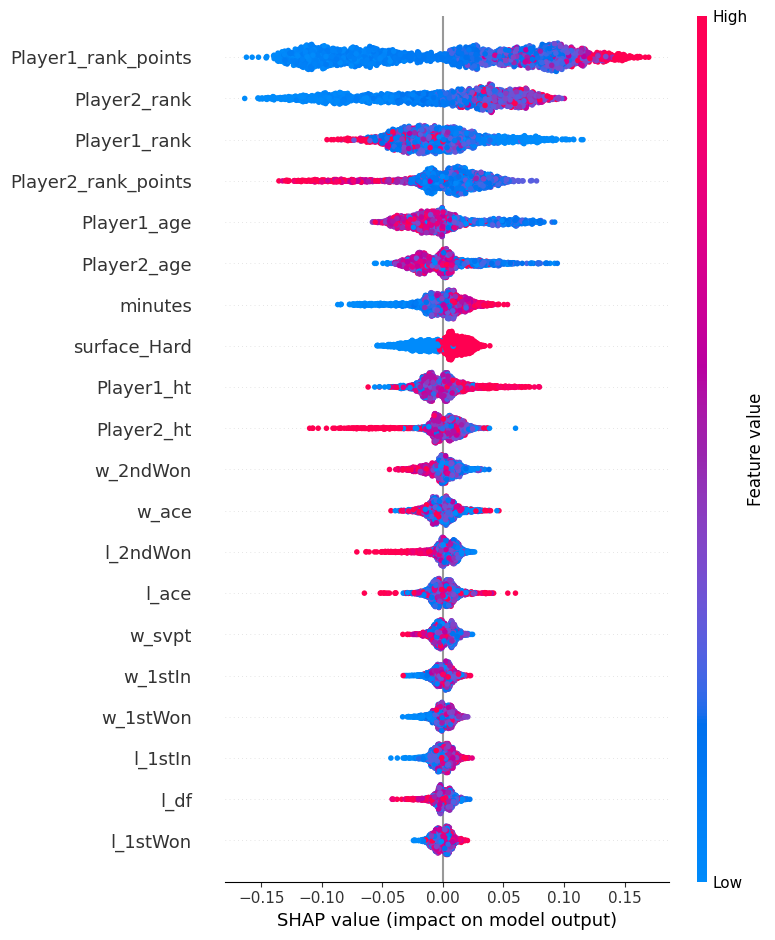

In [28]:
# Select SHAP values for the positive class (assuming class index 1)
shap_values_positive_class = shap_values[:, :, 1]

# Calculate the mean of the absolute SHAP values across all samples for the positive class
mean_abs_shap = np.mean(np.abs(shap_values_positive_class), axis=0)
feature_importance_df = pd.DataFrame({
        'Feature': X_train.columns,
        'Importance': mean_abs_shap
    }).sort_values(by='Importance', ascending=False)

import matplotlib.pyplot as plt
shap.summary_plot(shap_values_positive_class, sampled_X_train, show=False)
plt.show()
